In [1]:
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# loading data
data = pd.read_csv('cleaned_badminton_v2.csv')
data = data.drop(columns=['Unnamed: 0'])

# Assuming your data is stored in a DataFrame called 'data'
# Drop duplicates based on 'Observation Group Number', keeping only the last record
data.drop_duplicates(subset='OBSERVATION GROUP NUMBER', keep='last', inplace=True)
# Define X and Y Features
X_features = data[['HUMAN PLAYER POSITION (X) metres', 
                    'HUMAN PLAYER POSITION (Y) metres', 
                    'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 
                    'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)', 
                    'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)',
                    'SERVING SHOT']]

Y_feature = data['OBSERVATION NUMBER']

# Normalize features
scaler = MinMaxScaler()
X_features_normalized = scaler.fit_transform(X_features)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_features_normalized, Y_feature, test_size=0.2, random_state=42)

# Create a k-NN classifier object with k=6, given that I have six unique labels
knn = KNeighborsClassifier(n_neighbors=6)

In [9]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


array([[0.        , 0.        , 1.        , 1.        , 0.74      ,
        0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.45      ,
        0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.01      ,
        0.        ],
       ...,
       [0.        , 0.66666667, 1.        , 1.        , 0.04      ,
        0.        ],
       [0.        , 1.        , 1.        , 1.        , 0.34      ,
        0.        ],
       [0.        , 0.66666667, 0.        , 0.66666667, 0.73      ,
        0.        ]])

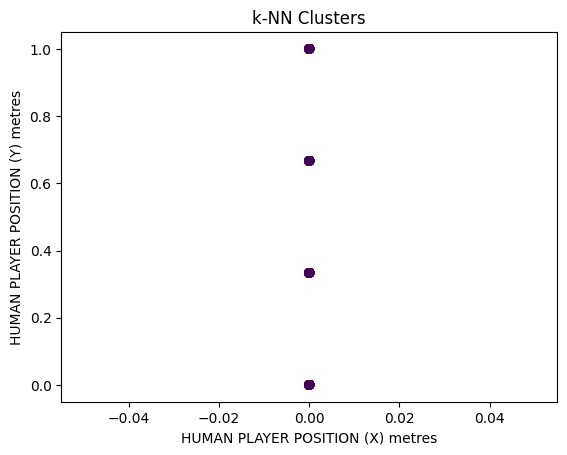

In [5]:
# Visualize the clusters
plt.scatter(X_features_normalized[:, 0], X_features_normalized[:, 1], c=Y_feature)
plt.xlabel('HUMAN PLAYER POSITION (X) metres')
plt.ylabel('HUMAN PLAYER POSITION (Y) metres')
plt.title('k-NN Clusters')
plt.show()